<center><h1>Deteccion de Malaria utilizando herramientas de Inteligencia Artificial</h1></center>
    
   ### ¿Que hicimos para que esto funcionara? :- 
   1. Importamos las librerias necesarias.
   2. Cargamos los datos.
   3. Se preprocesan los datos.
   4. Con tecnicas de "augmentation" se duplican la cantidad de imagenes disponibles.
   5. Se imprimen imagenes con sus caravteristicas para entender como luce una celula infectada y no ingectada-
   6. Separamos las imagenes en 2 sets (Entrenamiento y Prueba).
   7. Se crea el modelo de la Red Neuronal Convolucional.
   8. Utilizamos la API "Estimator" de TensorFlow para simplificar la programacion del entrenamiento y la prediccion 
   9. Entrenamos los datos con el set de Entrenamiento
   10. Se Prueban los resultados con el set de Prueba.
   11. Predecimos resultados en base al set de Prueba.
   12. Imprimimos las imagenes con su respectivo diagnostico y categoria.
   
  

In [1]:
from __future__ import absolute_import, division, print_function #libreria de compatibilidad de Python
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2 #formato cv2 de OpenCv
import matplotlib.pyplot as plt #libreria para mostrar y graficar informacion
import seaborn as sns #libreria para graficar mas elegantemente
from PIL import Image
import os #permite usar algunas caracteristicas del Sistema operativo en turno
print(os.listdir("C:\\Users\chris\Downloads\Datasets\Malaria\cell_images"))#por ejemplo buscar un archivo

['Parasitized', 'Uninfected']


In [2]:
infected = os.listdir('C:\\Users\chris\Downloads\Datasets\Malaria\cell_images/Parasitized/') 
uninfected = os.listdir('C:\\Users\chris\Downloads\Datasets\Malaria\cell_images/Uninfected/')

Aqui se normalizan las imagenes, para poder hacer un "augmentation" correcto

In [3]:
data = [] #Se crea la lista de datos donde se almacenaran todas las imagenes
labels = [] #Se crea la lista de etiquetas para clasificar las imagenes

for i in infected: #contador en infected
    try:
    #recoleta la imagen de la direccion
        image = cv2.imread("C:\\Users\chris\Downloads\Datasets\Malaria\cell_images/Parasitized/"+i)
    #agarra una imagen del arreglo y se le aplica el formato RGB y asigna un valor de intensidad a cada píxel.
    #En imágenes de 8 bits por canal, los valores de intensidad 
    #varían de 0 (negro) a 255 (blanco) para cada uno de los componentes RGB (rojo, verde, azul) de una imagen en color.
        image_array = Image.fromarray(image , 'RGB')
    #cambia el tamaño de la imagen a 50x50 px.
        resize_img = image_array.resize((50 , 50))
    #a la imagen aumentada de tamaño se le rota 45 grados
        rotated45 = resize_img.rotate(45)
    #a la imagen aumentada de tamaño se le rota 75 grados
        rotated75 = resize_img.rotate(75)
    #se le aplica el efecto de niebla a cada imagen del arreglo con un kernel de 10x10 px
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        #agrega a la lista de datos, las imagenes que han sido cambiadas 
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
    #Agrega a la lista de labels, la etiqueta "1" que signiica que esta infectada
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
 
    except AttributeError:
        print('')
    
#Ocurrira lo mismo que el codigo anterior, pero ahora con las celulas NO infectadas
for u in uninfected:
    try:
        
        image = cv2.imread("C:\\Users\chris\Downloads\Datasets\Malaria\cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

Aplicacion del "Augmentation"

In [4]:
#en la variable "cells" guardamos el arreglo con todos los elementos de la lista "data"
cells = np.array(data)
#en la variable "labels" guardamos el arreglo con todos los elementos de la lista "labels"
labels = np.array(labels)

#Guardamos los nuevos arreglos generados.
np.save('Celulas' , cells)
np.save('Etiquetas' , labels)

In [5]:
print('Celulas: {} | Etiquetas: {}'.format(cells.shape , labels.shape))

Celulas: (96453, 50, 50, 3) | Etiquetas: (96453,)


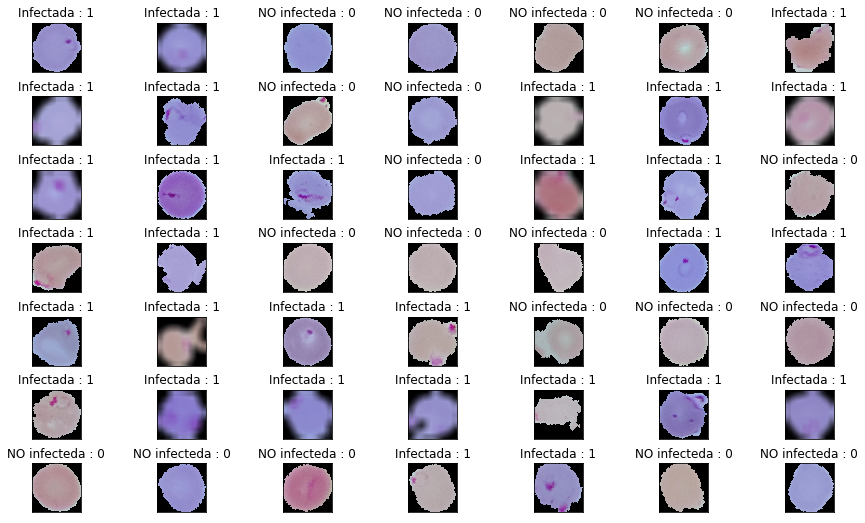

In [6]:
# Se imprimira una tabla para visualizar los datos
plt.figure(1 , figsize = (15 , 9))
n = 0 #contador de imagenes
for i in range(49):
    n += 1 
#regresa integers random de los inputs, con valor minimo 0 y valor maximo 1, forma 0 por defecto
    r = np.random.randint(0 , cells.shape[0] , 1)
#la tabla se imprimira en un tamaño 7x7 con la cantidad que se le de a N
    plt.subplot(7 , 7 , n)
#el espacio entre cada imagen sera de 0.5 
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
#imprimira una imagen aleatoria del conjunto de celulas
    plt.imshow(cells[r[0]])
#imprimira el formato de texto de la tabla dependiendo del valor de la etiqueta
    plt.title('{} : {}'.format('Infectada' if labels[r[0]] == 1 else 'NO infecteda' , labels[r[0]]) )
#imprimira los valores en el ejex y ejey, pero en este caso no los llenaremos, solo sera para darle forma a la tabla
    plt.xticks([]) , plt.yticks([])
#imprimiremos todo lo anterior    
plt.show()

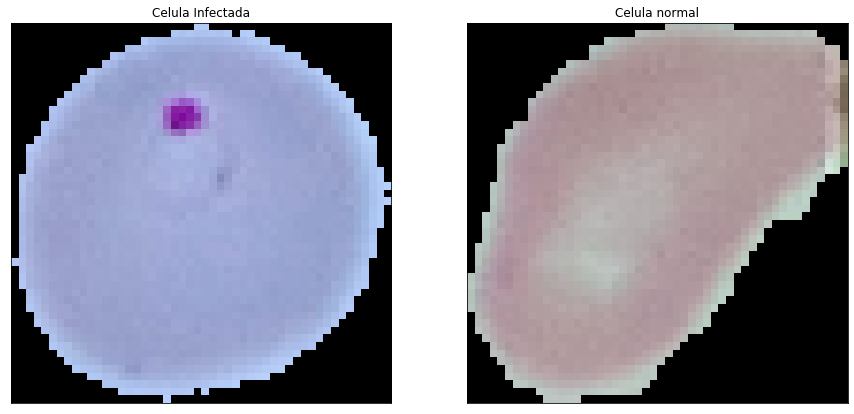

In [7]:
#Visualizaremos las imagenes
#tamaño de la imagen
plt.figure(1, figsize = (15 , 7))

#imagen 1
#ejex ejey y pósicion en la tabla generada (pos 1) 
plt.subplot(1 , 2 , 1)
#imprimir la imagen con la etiqueta que coincida
plt.imshow(cells[0])
plt.title('Celula Infectada')
#formato de la tabla
plt.xticks([]) , plt.yticks([])

#imagen 2
#ejex ejey y pósicion en la tabla generada (pos 2) 
plt.subplot(1 , 2 , 2)
#imprimir la imagen con la etiqueta que coincida
plt.imshow(cells[70002])
plt.title('Celula normal')
#formato de la tabla
plt.xticks([]) , plt.yticks([])

plt.show()

In [8]:
#variable n toma los valores del arreglo de celulas, sin importar su forma
n = np.arange(cells.shape[0])
# esta funcion barajea el arreglo por el primer eje de un arreglo multidimencional
#su orden cambiara pero el contenido sera el mismo
np.random.shuffle(n)
#guardamos el arreglo barajeado en las variables cells y labels
cells = cells[n]
labels = labels[n]

# La computadora usada para el proyecto se trabo por mas de 30 minutos y no se podia hacer nada.


In [9]:
#cambiaresmo el tipo de datos a los 2 vectores, pera que al ingresar en la red neuronal sea mas facil su procesamiento
#seran tipo "float32" el cual es un valor de 32 bits para el almacenamiento de datos
#se podria intentar con "float64" pero ocuparia mas memoria y mas tiempo de procesamiento
cells = cells.astype(np.float32)
#todos los datos del vector de labels seran tipo "int32"
labels = labels.astype(np.int32)
cells = cells/255 #Maximo valor posible

In [10]:
#Separar arreglos o matrices en subarreglos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Se separan los datos procesados en el subarreglo de entrenamiento.
#Y en 2 subarreglos extras que serviran para separar los datos restantes en los de evaluacion y prueba
                          # tomaremos los 2 arreglos de labels y cells               
train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,#representa la proporcion para prueba del subarreglo suele ser de 80/20 or 70/30
                                            random_state = 111) #sin este valor cada ves que se ejecute el programa tendra diferentes datos de entrenamiento
                                                                #ya que se generara un valor aleatorio, sacando diferentes valores cada vez

#se hara lo mismo con los subarreglos de prueba y evaluacion tomando en cuenta los subconjuntos de x y y
eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5, 
                                                    random_state = 111)

Ahora se dividiran los datos en entrenamiento, evaluación de modelos y conjunto de pruebas para pruebas, respectivamente

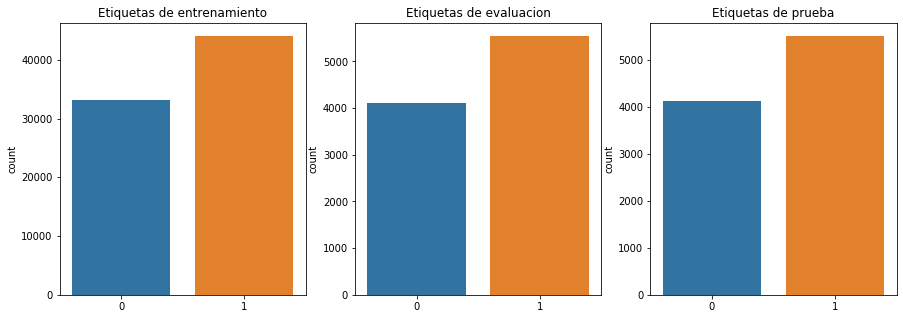

In [11]:
#imprimira las graficas con la cantidad de datos que tenemos en cada subarreglo
plt.figure(1 , figsize = (15 ,5))
n = 0 #contador
for z , j in zip([train_y , eval_y , test_y] , ['Etiquetas de entrenamiento','Etiquetas de evaluacion','Etiquetas de prueba']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()
                 
#el azul representa la cantidad de datos para testear cada subarreglo y la naranja es la cantidad total de datos

In [12]:
print('tamaño de datos para entrenar {} ,tamaño de datos pára evaluar {} , tamaño de datos para probar {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

tamaño de datos para entrenar (77162, 50, 50, 3) ,tamaño de datos pára evaluar (9645, 50, 50, 3) , tamaño de datos para probar (9646, 50, 50, 3)


Las redes neuronales convolucionales trabajan modelando de forma consecutiva pequeñas piezas de información, y luego combinando esta información en las capas más profundas de la red. Una manera de entenderlas es que la primera capa intentará detectar los bordes y establecer patrones de detección de bordes. Luego, las capas posteriores trataran de combinarlos en formas más simples y, finalmente, en patrones de las diferentes posiciones de los objetos, iluminación, escalas, etc. Las capas finales intentarán hacer coincidir una imagen de entrada con todas los patrones y arribar a una predicción final como una suma ponderada de todos ellos. De esta forma las redes neuronales convolucionales son capaces de modelar complejas variaciones y comportamientos dando predicciones bastantes precisas.

En general, las redes neuronales convolucionales van a estar construidas con una estructura que contendrá 3 tipos distintos de capas:

1: Una capa convolucional, que es la que le da le nombre a la red.
2: Una capa de pooling, la cual va a reducir la cantidad de parámetros al quedarse con las características más comunes.
3: Una capa clasificadora totalmente conectada, la cual nos va dar el resultado final de la red.

La operación de convolución recibe como entrada o input la imagen y luego aplica sobre ella un filtro o kernel que nos devuelve un mapa de las características de la imagen original, de esta forma logramos reducir el tamaño de los parámetros.


La capa de pooling se coloca generalmente después de la capa convolucional. Su utilidad principal radica en la reducción de las dimensiones espaciales (ancho x alto) del volumen de entrada para la siguiente capa convolucional. No afecta a la dimensión de profundidad del volumen. La operación realizada por esta capa también se llama reducción de muestreo, ya que la reducción de tamaño conduce también a la pérdida de información. Sin embargo, una pérdida de este tipo puede ser beneficioso para la red por dos razones:
La disminución en el tamaño conduce a una menor sobrecarga de cálculo para las próximas capas de la red;
también trabaja para reducir el sobreajuste.
La operación que se suele utilizar en esta capa es max-pooling, que divide a la imagen de entrada en un conjunto de rectángulos y, respecto de cada subregión, se va quedando con el máximo valor.

In [13]:
#Creacion de la red neuronal
tf.reset_default_graph()
def cnn_model_fn(features , labels , mode):
    #capa de inputs                          #-1 aplana y paquetes de 50 renglons y 50 columnas
    input_layers = tf.reshape(features['x'] , [-1 , 50 , 50 ,3])#Contenedor de imagenes    
    
    #capa convolucional 1, donde se aplicaran un total de 50 filtros a cada imagen 
    conv1 = tf.layers.conv2d(
        inputs = input_layers , 
        filters = 50 , 
        kernel_size = [7 , 7], #el kernel sera de un tamaño de 7 x 7 pixeles
        padding = 'same', #con paso de 1 pixel a la vez
        activation = tf.nn.relu #funcion de activacion relu
        ) 
    
    #capa convolucional 2
    conv2 = tf.layers.conv2d(
        inputs = conv1, 
        filters = 90,
        kernel_size = [3 , 3],
        padding = 'valid',
        activation = tf.nn.relu
        )

    #capa convolucional 3    
    conv3 = tf.layers.conv2d(
        inputs = conv2 ,
        filters = 10,
        kernel_size = [5 , 5],
        padding = 'same', 
        activation = tf.nn.relu
        )
    
    #A pooling layer that reduces the image dimensionality without losing important features or patterns.
    pool1 = tf.layers.max_pooling2d(inputs = conv3 ,
                                    pool_size = [2 , 2] ,
                                    strides = 2 )
    
    #capa convolucional 4
    conv4 = tf.layers.conv2d(
        inputs = pool1 ,
        filters = 5,
        kernel_size = [3 , 3],
        padding = 'same', 
        activation = tf.nn.relu
        )

    pool2 = tf.layers.max_pooling2d(inputs = conv4 , 
                                    pool_size = [2 , 2] ,
                                    strides = 2 ,
                                    padding = 'same')
    
    #In between the convolutional layer and the fully connected layer, there is a ‘Flatten’ layer.
    #Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a
    #fully connected neural network classifier.
    pool2_flatten = tf.layers.flatten(pool2)
    fc1 = tf.layers.dense(
        inputs = pool2_flatten,
        units = 2000,
        activation = tf.nn.relu
        )
    fc2 = tf.layers.dense(
        inputs = fc1,
        units = 1000,
        activation = tf.nn.relu
        )
    fc3 = tf.layers.dense(
        inputs = fc2 , 
        units = 500 ,
        activation = tf.nn.relu
        )
    
   #A fully connected layer also known as the dense layer, 
    #in which the results of the convolutional layers are fed through one or more neural layers to generate a prediction.
     
    logits = tf.layers.dense(
        inputs = fc3 ,
        units = 2
        )
    
    predictions = {
        'classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , 
                                                 logits = logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
        train_op = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_op 
                                           )
    eval_metric_op = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['classes'])}
    
    return tf.estimator.EstimatorSpec(mode = mode , 
                                      loss = loss , 
                                      eval_metric_ops = eval_metric_op)    

In [14]:
#todos los procesos que hara la red neuronal se iran guardando en un archivo temporal

malaria_detector = tf.estimator.Estimator(model_fn = cnn_model_fn , 
                                          #model_dir = '/tmp/modelchkpt'
                                          model_dir = '/tmp/malariachkpt')
#diagonales alreves
                                         #model_dir = 'C:\Users\chris\Documents\Jupyter Proyects')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/malariachkpt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FE46920B70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
tensors_to_log = {'probabilities':'softmax_tensor'} 
logging_hook = tf.train.LoggingTensorHook(        
    tensors = tensors_to_log , every_n_iter = 50#Imprime los tensores dados a cada n pasos cada n segundos o solo al final
    )

In [16]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y,
    batch_size = 100 , 
    num_epochs = None , 
    shuffle = True
    )
malaria_detector.train(input_fn = train_input_fn , steps = 1 , hooks = [logging_hook])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/malariachkpt\model.ckpt.
INFO:tensorflow:probabilities = [[0.49037462 0.50962543]
 [0.49133673 0

# La computadora utilizada tardo más de 7 horas entrenando la red


In [ ]:
malaria_detector.train(input_fn = train_input_fn , steps = 10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/malariachkpt\model.ckpt-1
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/malariachkpt\model.ckpt.
INFO:tensorflow:loss = 0.6878979, step = 2
INFO:tensorflow:global_step/sec: 0.353985
INFO:tensorflow:loss = 0.69047964, step = 102 (282.509 sec)
INFO:tensorflow:global_step/sec: 0.318446
INFO:tensorflow:loss = 0.68778616, step = 202 (314.029 sec)
INFO:tensorflow:Saving checkpoints for 203 into /tmp/malariachkpt\model.ckpt.
INFO:tensorflow:global_step/sec: 0.352823
INFO:tensorflow:loss = 0.682381, step = 302 (283.447 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 0.364839
INFO:tensorflow:loss = 0.5105271, step = 4902 (274.109 sec)
INFO:tensorflow:Saving checkpoints for 4998 into /tmp/malariachkpt\model.ckpt.
INFO:tensorflow:global_step/sec: 0.362878
INFO:tensorflow:loss = 0.50587136, step = 5002 (275.559 sec)
INFO:tensorflow:global_step/sec: 0.362105
INFO:tensorflow:loss = 0.49234733, step = 5102 (276.181 sec)
INFO:tensorflow:global_step/sec: 0.361382
INFO:tensorflow:loss = 0.47755638, step = 5202 (276.713 sec)
INFO:tensorflow:Saving checkpoints for 5215 into /tmp/malariachkpt\model.ckpt.
INFO:tensorflow:global_step/sec: 0.346691
INFO:tensorflow:loss = 0.47597817, step = 5302 (288.457 sec)
INFO:tensorflow:global_step/sec: 0.338915
INFO:tensorflow:loss = 0.38780385, step = 5402 (295.043 sec)
INFO:tensorflow:Saving checkpoints for 5421 into /tmp/malariachkpt\model.ckpt.
INFO:tensorflow:global_step/sec: 0.356938
INFO:tensorflow:loss = 0.43602723, step = 5502 (280.153 sec)
INFO:tensorflow:global_step/sec: 0.323413
I

In [ ]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': eval_x},
    y = eval_y , 
    num_epochs = 1 , 
    shuffle = False
    )
eval_results = malaria_detector.evaluate(input_fn = eval_input_fn)
print(eval_results)

In [ ]:
pred_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x' : test_x},
    y = test_y,
    num_epochs = 1,
    shuffle = False
    )

y_pred = malaria_detector.predict(input_fn = pred_input_fn)
classes = [p['classes'] for p in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(test_y , classes) , 
                           classification_report(test_y , classes) , 
                            
                            accuracy_score(test_y , classes)))

Diagnostico 0 = Saludable
Diagnositco 1 = Tiene Malaria

Categoria 0 = NO infectado
Categoria 1= Infectado

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('Diag {} : Categ {}'.format(test_y[r[0]] , classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

# Aqui termina nuestro proyecto :D